# Standardization and Normalization

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
#feature scaling only use on numeric data and datacleaning process complete,aswell as all veriableconvert in num format
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df2 =df[['survived','pclass','age','parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [5]:
df3= df2.fillna(df2.mean()) #all data is fill 

In [6]:
x= df3.drop("survived",axis = 1)
y =df3["survived"]
print('x is independent feature and shape of x  = ', x.shape)
print('y is dependent feature and shape of y  = ', y.shape)

#totle rows = 891

x is independent feature and shape of x  =  (891, 3)
y is dependent feature and shape of y  =  (891,)


In [9]:
#tainr data par machine algo ko train kar te h
#test data par machine algo ko test kar te h
 
x_train, x_test, y_train,y_test = train_test_split(x,y , test_size =0.2,random_state =51) 
print('Shape of x_train = ', x_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_test = ', y_test.shape)

    

Shape of x_train =  (712, 3)
Shape of x_test =  (179, 3)
Shape of x_train =  (712, 3)
Shape of y_test =  (179,)


In [12]:
#jb data train and testhota h tb feature scaling karte  h 
sc = StandardScaler()
sc.fit(x_train) # std scaler ne xtrin  kolearn kar liya h 

StandardScaler()

In [14]:
sc.mean_ # tino feature ke mean 

array([ 2.30617978, 29.55409121,  0.39185393])

In [16]:
sc.scale_ #tino  feature ka std 

array([ 0.84405789, 12.99162985,  0.79647463])

In [17]:
x_train.describe() # sab ek sath dekhne ke liye 

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [20]:
x_train_sc= sc.transform(x_train)
x_test_sc= sc.transform(x_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
x_train_sc

array([[-1.75837972, -2.30776312, -1.1096893 ],
       [-1.75837972, -2.12113234, -1.1096893 ],
       [-1.75837972, -2.38478535, -1.1096893 ],
       ...,
       [-1.75837972, -2.16556824,  3.61939826],
       [-1.75837972, -2.27399706,  0.46667322],
       [-1.75837972, -2.28110158, -1.1096893 ]])

In [24]:
#creat dataframe for thedata
x_train_sc = pd.DataFrame(x_train_sc ,columns = ['pclass', 'age',"parch"])
x_test_sc =pd.DataFrame(x_test_sc , columns =  ['pclass', 'age',"parch"])

                        

In [25]:
#data scale dekhne ke liye 
x_train_sc.head()

,pclass,age,parch
0,-1.75838,-2.307763,-1.109689
1,-1.75838,-2.121132,-1.109689
2,-1.75838,-2.384785,-1.109689
3,-1.75838,-2.343312,-1.109689
4,-1.75838,-2.273997,2.043036


In [26]:
x_train_sc.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,-2.732253,-2.274856,-0.491985
std,1.185586,0.077027,1.256415
min,-4.565658,-2.447470,-1.109689
25%,-3.512929,-2.319613,-1.109689
50%,-1.758380,-2.273997,-1.109689
75%,-1.758380,-2.242590,-1.109689
max,-1.758380,-2.029298,6.772123


In [28]:
x_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,-2.73,-2.27,-0.49
std,1.19,0.08,1.26
min,-4.57,-2.45,-1.11
25%,-3.51,-2.32,-1.11
50%,-1.76,-2.27,-1.11
75%,-1.76,-2.24,-1.11
max,-1.76,-2.03,6.77


In [29]:
mmc =MinMaxScaler()
mmc.fit(x_train)

MinMaxScaler()

In [30]:
x_train_mmc = mmc.transform(x_train)
x_test_mmc = mmc.transform(x_test)


In [31]:
x_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [32]:
#creat dataframe for thedata
x_train_mmc = pd.DataFrame(x_train_mmc ,columns = ['pclass', 'age',"parch"])
x_test_mmc =pd.DataFrame(x_test_mmc , columns =  ['pclass', 'age',"parch"])

                        

In [33]:
x_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


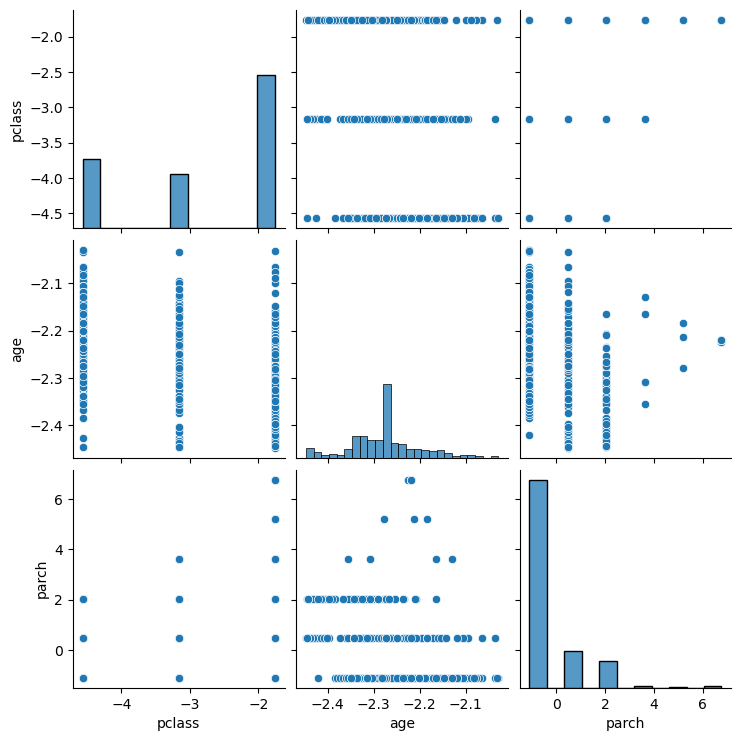

In [37]:
sns.pairplot(x_train_sc)

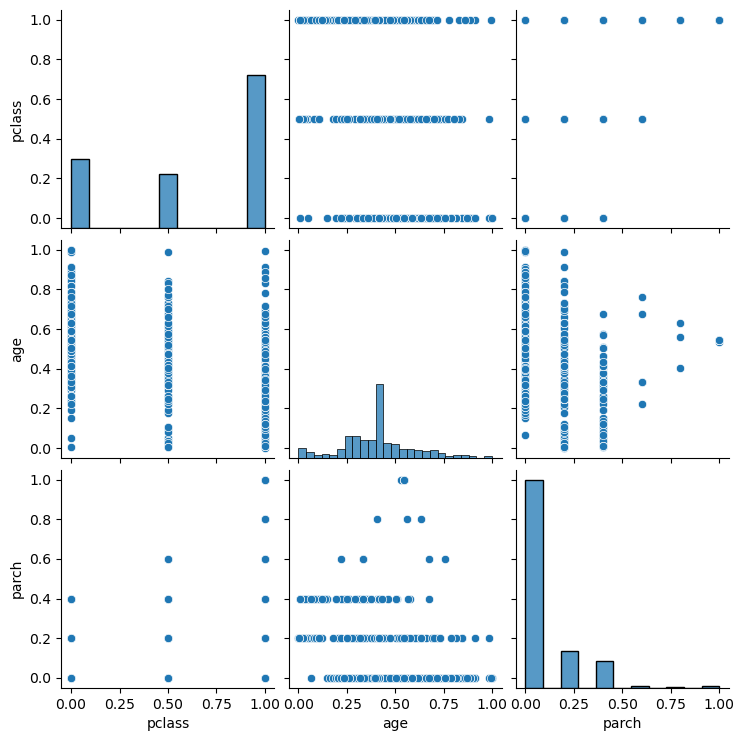

In [38]:
sns.pairplot(x_train_mmc)